### Exemplo prático

In [1]:
import pandas as pd

In [33]:
#Criando as listas x e y
data = [[1.65, 'M'], [1.50,'B'], [1.70,'M'], [1.92,'A'],
       [1.54,'B'], [1.6,'M'], [1.71,'A'], [1.55,'B'],
       [1.67, 'M'], [1.81,'A'], [1.59, 'B']]

In [34]:
#Criando um dataframe com os dados gerados e colunas x e y
df = pd.DataFrame(data, columns=['x','y'])

In [35]:
df.shape

(11, 2)

In [36]:
df.head()

,x,y
0,1.65,M
1,1.50,B
2,1.70,M
3,1.92,A
4,1.54,B


#### Criando um algoritmo de forma explícita

In [37]:
#Definindo uma classe pra representar o modelo
class Model():
    def predict(self, x):
        if x < 1.6:
            y = 'B'
        elif x <= 1.7:
            y = 'M'
        else: 
            y = 'A'
        return y

In [38]:
#Instanciando um modelo
model1 = Model()

#Realizando a predição
newX = 1.59
m1YPred = model1.predict(newX)
print("Predicted value: " + m1YPred)

Predicted value: B


#### Usando um algoritmo de árvore de decisão

In [12]:
#Importando a lib para treinar um modelo baseado em árvores de decisão
from sklearn.tree import DecisionTreeClassifier

In [39]:
#Separando os dados de entrada (atributos preditivos) e saída (atributo alvo/target)
X_train = df['x'].values.reshape(-1, 1)
y_train = df['y']

In [40]:
X_train

array([[1.65],
       [1.5 ],
       [1.7 ],
       [1.92],
       [1.54],
       [1.6 ],
       [1.71],
       [1.55],
       [1.67],
       [1.81],
       [1.59]])

In [41]:
#Criando um modelo de classificação - DecisionTreeClassifier
model2 = DecisionTreeClassifier()

#Treinando o modelo
model2 = model2.fit(X_train, y_train)

In [50]:
#Realizando a predição
newX = [[1.59]]
m2YPred = model2.predict(newX)
print("Predicted value: " + m2YPred[0])

Predicted value: B


In [24]:
#Visualizando a árvore de decisão
import os
import io
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data

In [42]:
feature_cols = df.drop('y', axis=1).columns
class_label = model2.classes_

In [43]:
feature_cols

Index(['x'], dtype='object')

In [44]:
class_label

array(['A', 'B', 'M'], dtype=object)

In [45]:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=class_label)

In [46]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

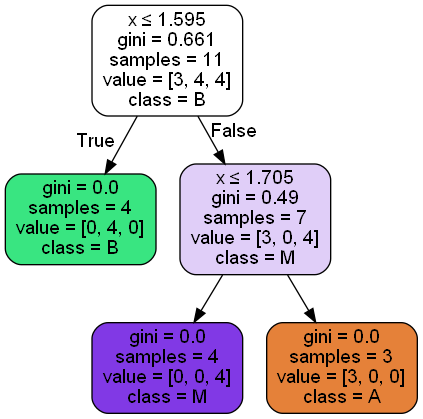

In [47]:
(graph, ) = graph_from_dot_data(dot_data.getvalue())

graph.write_png("tree.png")
Image('tree.png')